In [1]:
import string
from pickle import load
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import load_img , img_to_array 
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model , to_categorical
from tensorflow.keras.models import Model , load_model

In [2]:
def extract_feature(filename,model):
    image = Image.open(filename)
    image = image.resize((224,224))
    image = img_to_array(image)
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image,verbose=1)
    return feature

In [3]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

In [4]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [5]:
model = load_model('Best_Model.h5')

In [19]:
model2 = load_model('image_caption.h5')

1/1 [==============================] - 1s 983ms/step
Predict Caption
startseq boy wearing blue shirt running into sand endseq


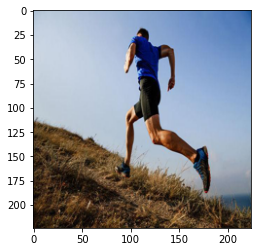

In [36]:
img_path = 'test/test15.jpg'
max_length = 66
tokenizer = load(open("tokenizer2.p","rb"))
mobilenet_model = tensorflow.keras.applications.MobileNetV2()
mobilenet_model = keras.models.Model(inputs=mobilenet_model.inputs,outputs=mobilenet_model.layers[-2].output)
photo = extract_feature(img_path, mobilenet_model)
img = Image.open(img_path)
img = img.resize((224,224))
description = predict_caption(model, photo, tokenizer, max_length)
print("Predict Caption")
print(description)
plt.imshow(img)

1/1 [==============================] - 1s 678ms/step
Predict Caption
startseq man wearing white shirt and black pants climbing rock endseq


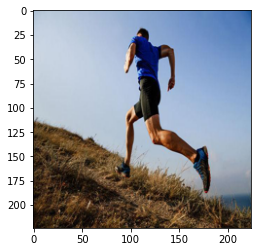

In [37]:
img_path = 'test/test15.jpg'
max_length = 28
tokenizer = load(open("tokenizer.p","rb"))
mobilenet_model = tensorflow.keras.applications.MobileNetV2()
mobilenet_model = keras.models.Model(inputs=mobilenet_model.inputs,outputs=mobilenet_model.layers[-2].output)
photo = extract_feature(img_path, mobilenet_model)
img = Image.open(img_path)
img = img.resize((224,224))
description = predict_caption(model2, photo, tokenizer, max_length)
print("Predict Caption")
print(description)
plt.imshow(img)